- **TODO** Find this fire in the Waldbrandstatistik

In [1]:
from pathlib import Path
import geopandas as gpd
from sentinel_helpers import geodataframe_on_map

In [2]:
nbr_path = Path('output/spectral_indices/')
product_path = Path('input/forest_fires/')

In [3]:
products_2018 = list(product_path.glob('*2018*.tif'))

- we calculcated the nbr in another notebook

In [4]:
nbr_2018 = list(nbr_path.glob('*2018*NBR*.tif'))
nbr_2018

[PosixPath('output/spectral_indices/T33UUT_20180807T101021_NBR_10m.tif'),
 PosixPath('output/spectral_indices/T33UUT_20180822T101019_NBR_10m.tif'),
 PosixPath('output/spectral_indices/T33UUT_20180919T102021_NBR_10m.tif')]

In [5]:
evacuated_2018 = gpd.read_file(product_path / 'evacuated_2018.json')
geodataframe_on_map(evacuated_2018)

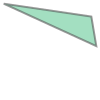

In [6]:
from shapely.geometry import Polygon
area_of_interest = Polygon(evacuated_2018['geometry'].values)
area_of_interest

## Calculate NBR / dNBR

- NBR is calculated using [02 Spectral Indices.iypnb]

In [7]:
import matplotlib.pyplot as pplt
from sentinel_helpers import scihub_band_paths, RasterReaderList
import rasterio as r
import rasterio.plot as rplt

- We plot all of the calculated NBRs side by side

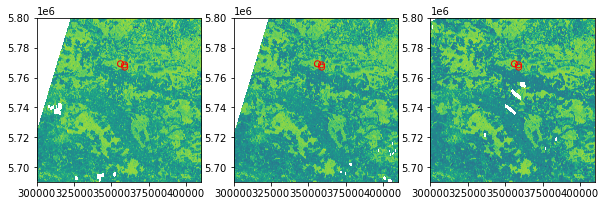

In [8]:
with RasterReaderList(nbr_2018) as readers:
    fig, (ax1, ax2, ax3) = pplt.subplots(nrows=1, ncols=3, figsize=(10, 10))
    evacuated = evacuated_2018.to_crs(readers[0].crs)
    
    rplt.show(readers[0], ax=ax1)
    evacuated.plot(ax=ax1, facecolor='none', edgecolor='red')
    
    rplt.show(readers[1], ax=ax2)
    evacuated.plot(ax=ax2, facecolor='none', edgecolor='red')
    
    rplt.show(readers[2], ax=ax3)
    evacuated.plot(ax=ax3, facecolor='none', edgecolor='red')

- join cloud masks

- Calculate dNBR ($pre - post$)

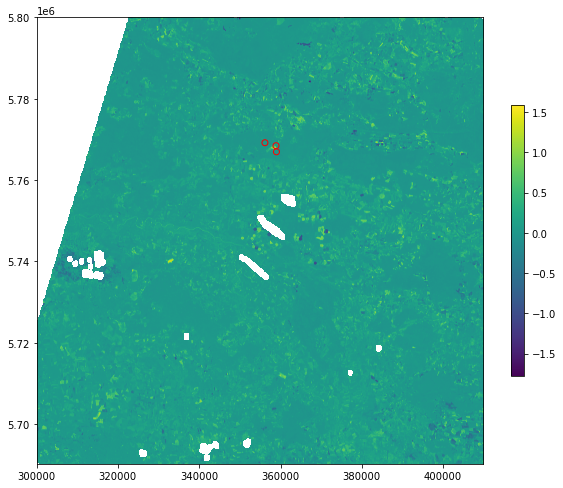

In [18]:
with RasterReaderList(nbr_2018) as readers:
    fig, ax = pplt.subplots(figsize=(10, 10))
    evacuated = evacuated_2018.to_crs(readers[0].crs)
    
    pre_fire = readers[0].read(masked=True)
    post_fire = readers[2].read(masked=True)
    
    # we need to mask invalid pixels in any of the input files for the resulting file
    dnbr = pre_fire - post_fire
    dnbr.mask = pre_fire.mask | post_fire.mask
    
    rplt.show(dnbr, ax=ax, transform=readers[0].transform)
    evacuated.plot(ax=ax, facecolor='none', edgecolor='red')
    fig.colorbar(ax.get_images()[0], shrink=0.5)

## 2019